# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
df=pd.read_csv('datasets/Categorical.csv')
len(df)

241

Remove the duplicate index column from the dataset. 

In [3]:
df.sample(5)

,name,Longitude,Latitude,continent
236,Samoa,-172.164851,-13.753243,Oceania
221,Taiwan,120.954273,23.753993,Asia
55,Cyprus,33.006002,34.916672,Asia
231,British Virgin Is.,-64.471470,18.525858,North America
108,Jersey,-2.126899,49.218374,Europe


In [4]:
len(df)

241

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [5]:
col=sorted(df['continent'].unique())
m={}
for i in range(0,len(col)):
    m[col[i]]=i
m

{'Africa': 0,
 'Antarctica': 1,
 'Asia': 2,
 'Europe': 3,
 'North America': 4,
 'Oceania': 5,
 'Seven seas (open ocean)': 6,
 'South America': 7}

In [6]:
df['continent']=df['continent'].map(m)

In [7]:
df.sample(5)

,name,Longitude,Latitude,continent
199,St. Pierre and Miquelon,-56.303198,46.919188,4
227,Uzbekistan,63.140015,41.755542,2
60,Denmark,10.028010,55.981253,3
237,Yemen,47.586762,15.909280,2
86,Greenland,-41.341911,74.710513,4


## Select the features

In [8]:
x=df.iloc[:,3:4]
x

,continent
0,4
1,2
2,0
3,4
4,3
...,...
236,5
237,2
238,0
239,0


## Clustering

Use 4 clusters initially.

In [9]:
km=KMeans(4)
km.fit(x)

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

## Clustering results

In [10]:
df_with_cluster=df.copy()
df_with_cluster['Cluster']=km.predict(x)

In [11]:
df_with_cluster.sample(5)

,name,Longitude,Latitude,continent,Cluster
82,Guinea-Bissau,-14.949724,12.047449,0,3
176,Dem. Rep. Korea,127.192480,40.153503,2,0
155,New Caledonia,165.684924,-21.299918,5,1
20,Benin,2.327853,9.641760,0,3
36,Bhutan,90.401882,27.411066,2,0


## Plot the data

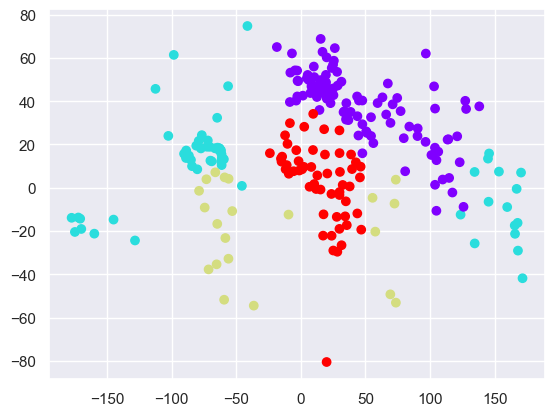

In [12]:
plt.scatter(df['Longitude'],df['Latitude'],c=df_with_cluster['Cluster'],cmap='rainbow')

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


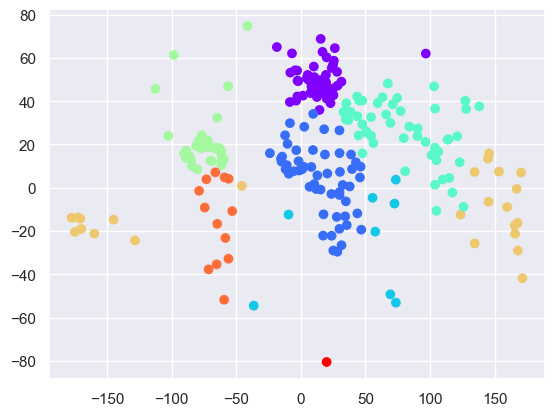

In [13]:
km=KMeans(8)
km.fit(x)
df_with_cluster=df.copy()
df_with_cluster['Cluster']=km.predict(x)
plt.scatter(df['Longitude'],df['Latitude'],c=df_with_cluster['Cluster'],cmap='rainbow')
plt.show()

### WCSS

In [14]:
km.inertia_

1.9822749508402288e-28

### The Elbow Method

In [15]:
wcss=[]
for i in range(1,9):
    km=KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)


c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

In [16]:
wcss

[944.448132780083,
 323.667432470064,
 124.51720243728667,
 46.3720318933598,
 20.64387655355397,
 5.934199134199135,
 0.9818181818181816,
 1.9822749508402288e-28]

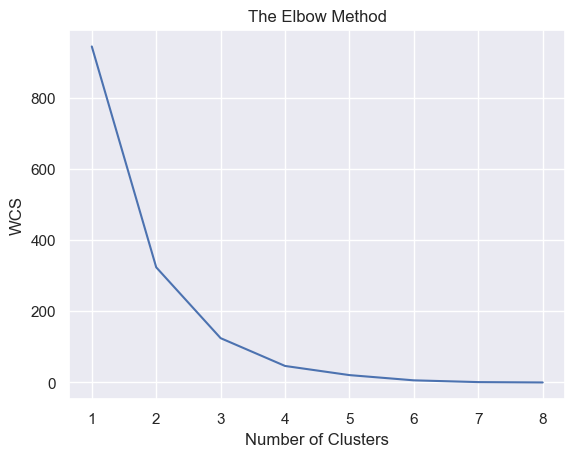

In [17]:
number_cluster=range(1,9)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.ylabel('WCS')
plt.xlabel('Number of Clusters')
plt.show()